# Business Objective



## To create Customer cluster to identify the different types of customers

#### Importing required Python Libraries

In [117]:
import pandas as pd
import numpy as np
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for models
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.datasets import make_circles


import warnings

warnings.filterwarnings("ignore")

### Loading Data

In [3]:
mall_df=pd.read_csv("Proj3_MallCustomers_Data_Project.csv")
mall_df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
59,60,Male,53,46,46
108,109,Male,68,63,43
198,199,Male,32,137,18
66,67,Female,43,48,50
37,38,Female,30,34,73


### Understanding data

In [5]:
#We can see from the below each columns information and can get idea about the distribution of data
mall_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
mall_df.info()
#Above code provides us the whole information of dataset about thier datatype, memory usage columns etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# It gives the dimensions of the dataset into rows and columns
mall_df.shape

(200, 5)

### Checking for null Values

In [9]:
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

##### Checking for duplicated values

In [10]:
mall_df[mall_df.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


#### No duplicated values found in our dataset

## Visualization

##### Univariate Analysis

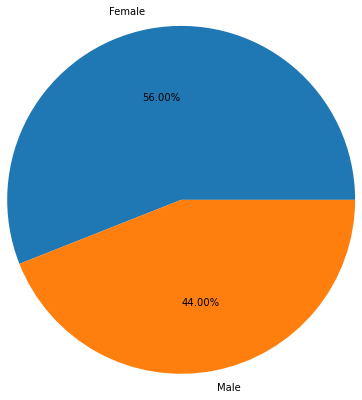

In [32]:
#fig, ax=plt.subplots(1,2,figsize=(16,8))
#ax[0].set_title("Count of Gender")
percentage=mall_df["Gender"].value_counts()
labels=list(mall_df["Gender"].value_counts().index)

#sns.countplot(x=mall_df["Gender"], ax=ax[0])
plt.pie(percentage,labels=labels, autopct="%0.2f%%",radius=2)

plt.show()

###### Pie chart clearly shows thats Female customers have more influence in dataset

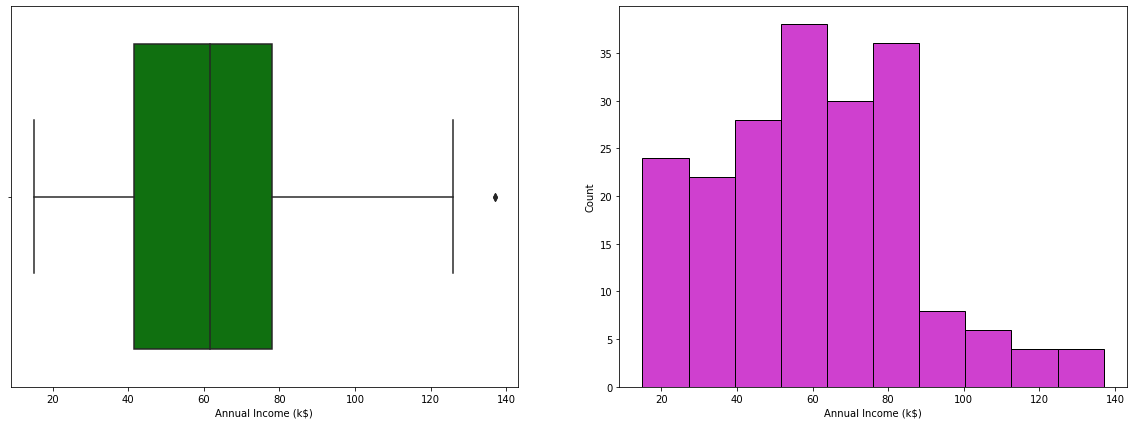

In [37]:
# Distribution of Annual Income (k$)
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = mall_df["Annual Income (k$)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = mall_df["Annual Income (k$)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

#### Almost 80 % of the customers have Annual Income (k) less  than  80k dollars

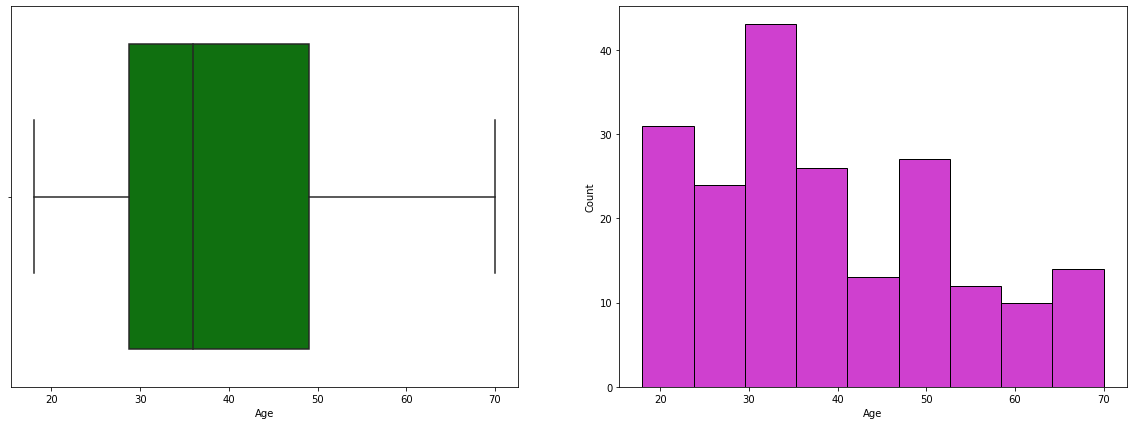

In [38]:
# Distribution of Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = mall_df["Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = mall_df["Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

##### 50% of the customers have age between 28-48 years and 75% of the customers are below 50 years 

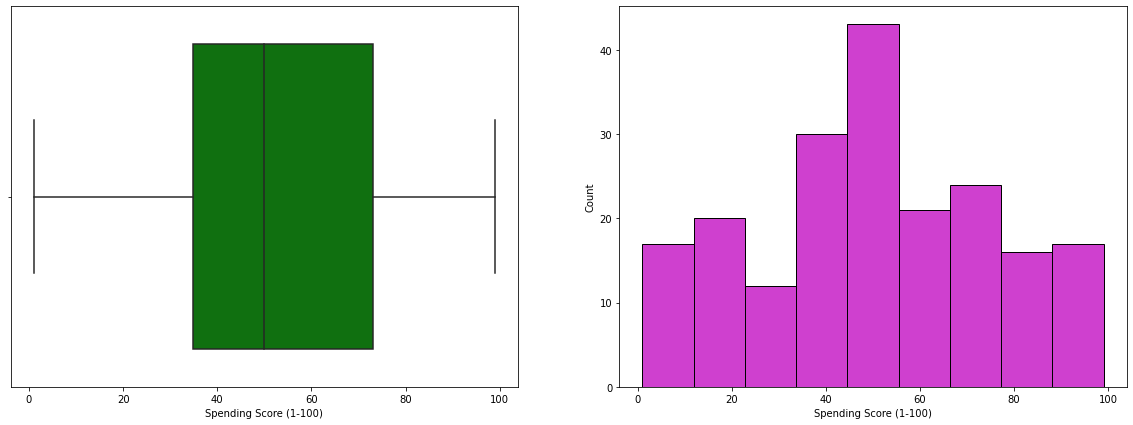

In [39]:
# Distribution of Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = mall_df["Spending Score (1-100)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = mall_df["Spending Score (1-100)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

#### Majority of the customers have spendings score between 36-74

#### Bivariate Analysis

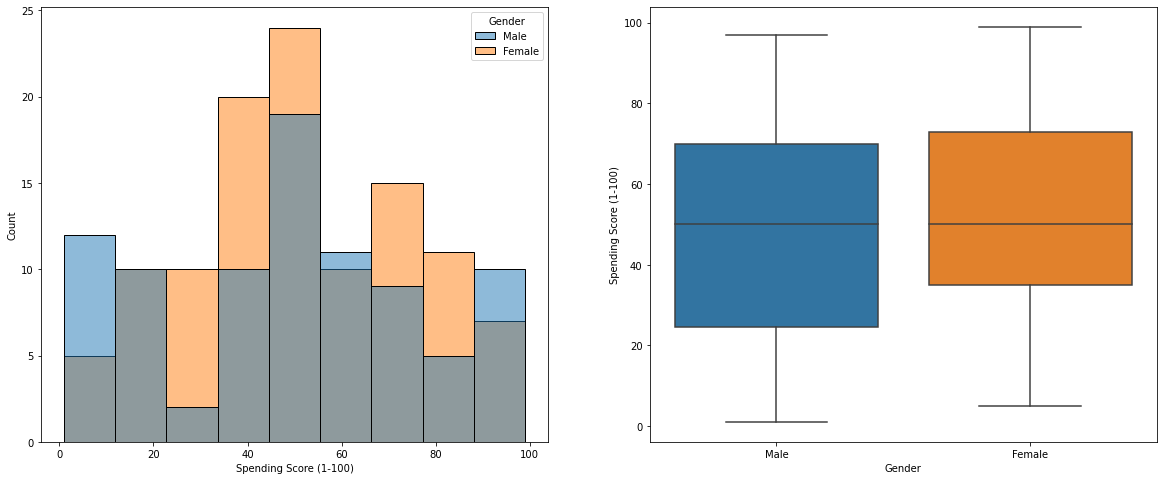

In [42]:
fig, ax = plt.subplots(1, 2, figsize = (20,8 ))
sns.histplot(x = mall_df['Spending Score (1-100)'], hue = mall_df['Gender'], ax = ax[0])
sns.boxplot(y = mall_df['Spending Score (1-100)'], x = mall_df['Gender'], ax = ax[1])
plt.show()

##### Females have slightly higher spending score as compare male customers

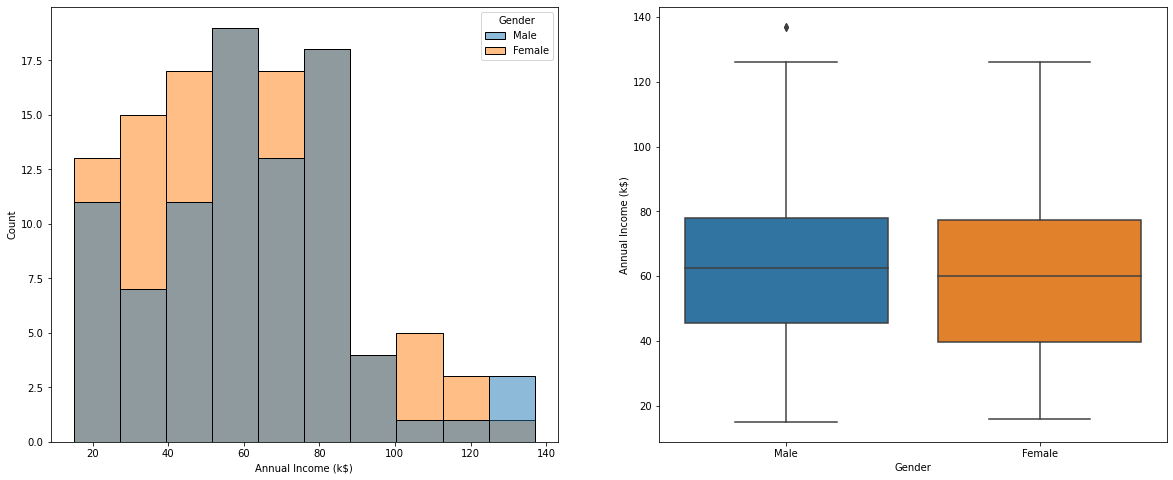

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (20,8 ))
sns.histplot(x = mall_df['Annual Income (k$)'], hue = mall_df['Gender'], ax = ax[0])
sns.boxplot(y = mall_df['Annual Income (k$)'], x = mall_df['Gender'], ax = ax[1])
plt.show()

###### Male and female incomes are almost same but some outliers are their in males annual incomes

#### Multivariate Analysis

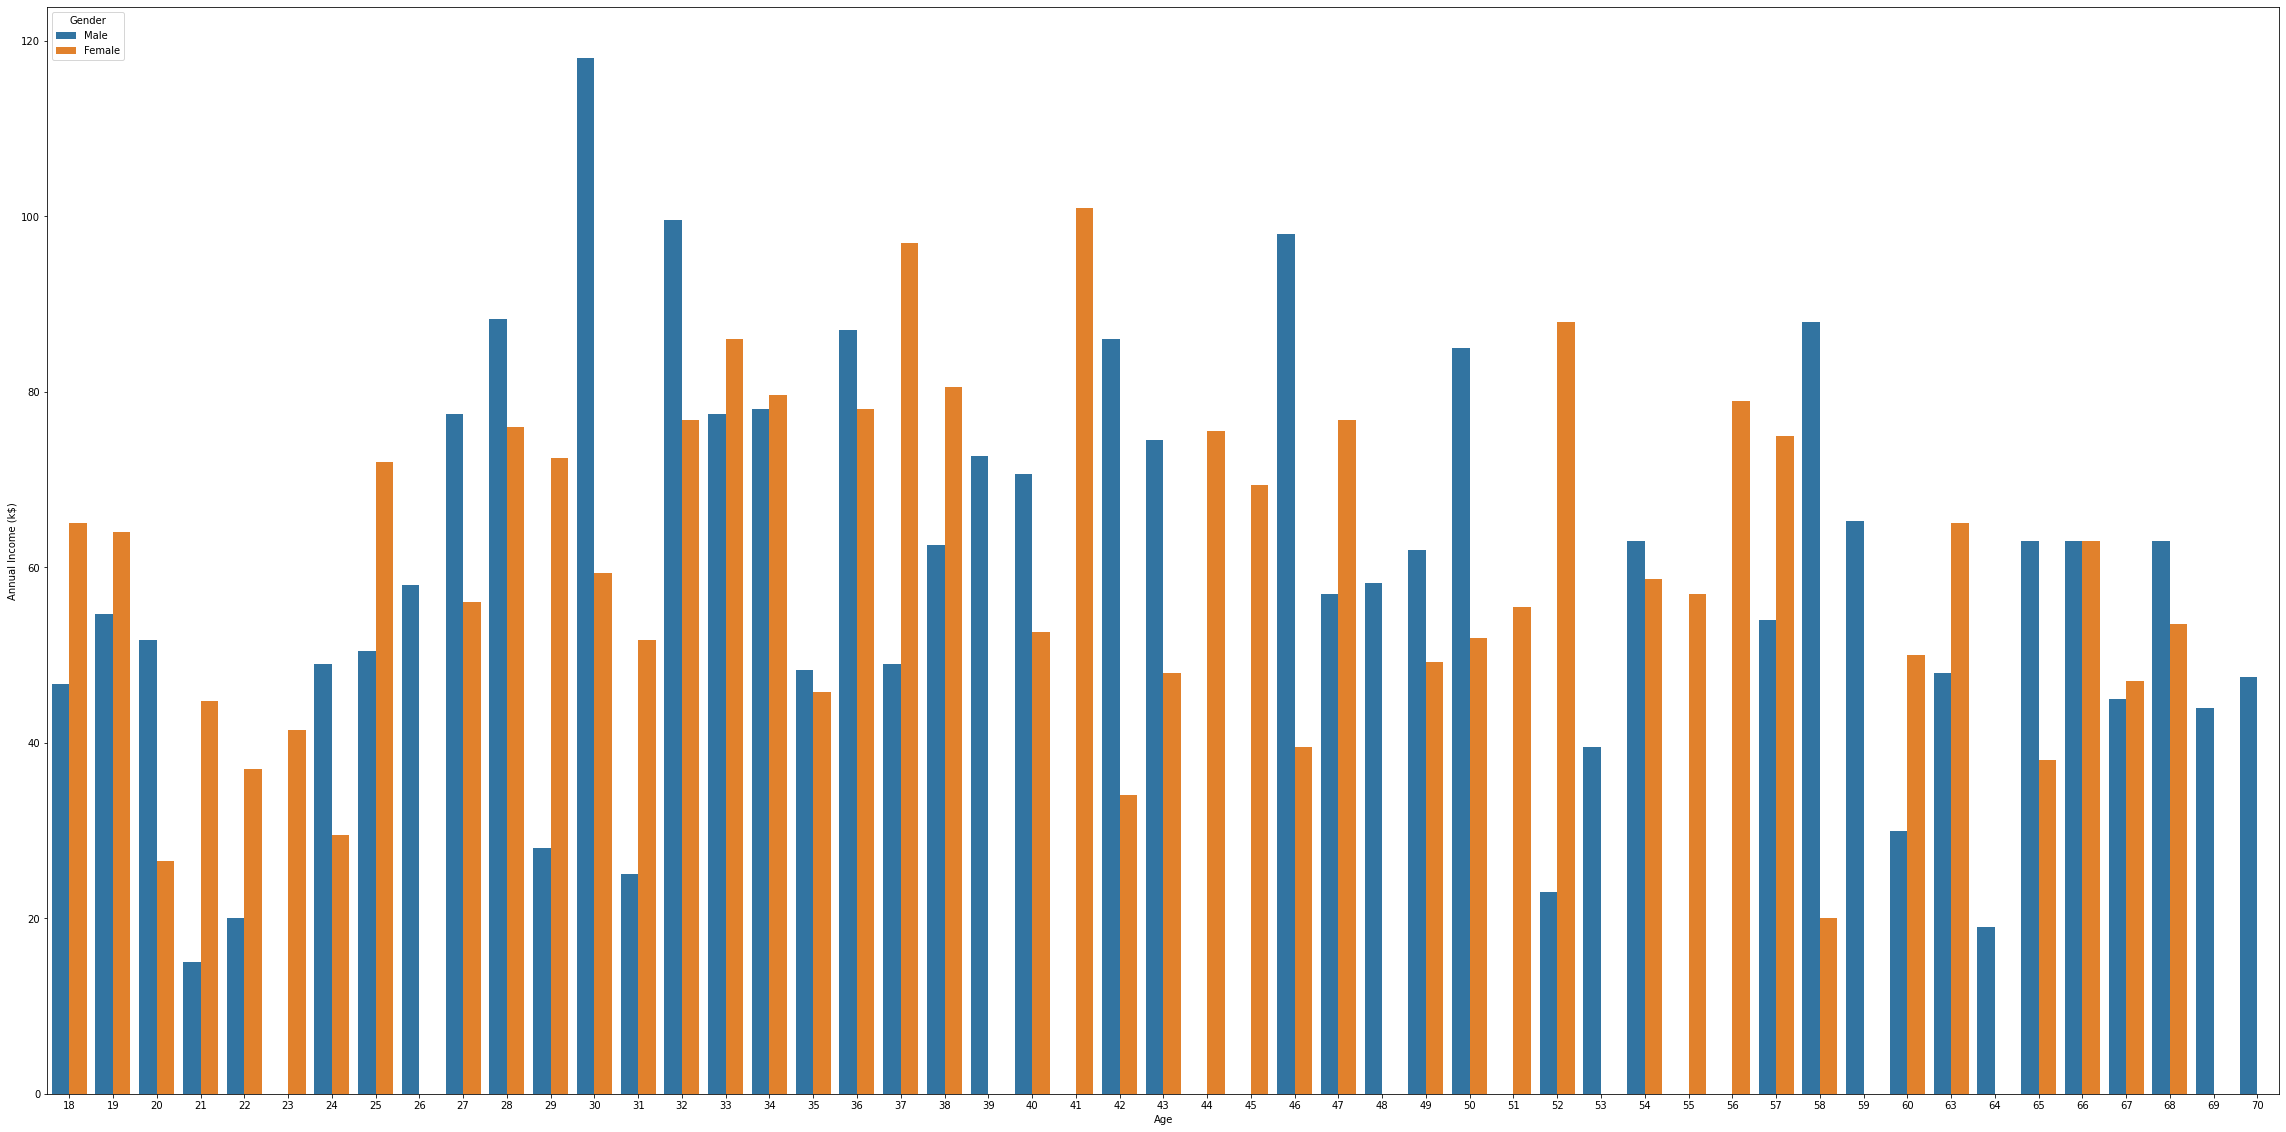

In [60]:
fig,ax= plt.subplots(figsize=(40,20))
sns.barplot(x=mall_df['Age'],y=mall_df['Annual Income (k$)'],hue=mall_df['Gender'],ci=None,ax=ax)
count=len(mall_df['Age'])
plt.show()

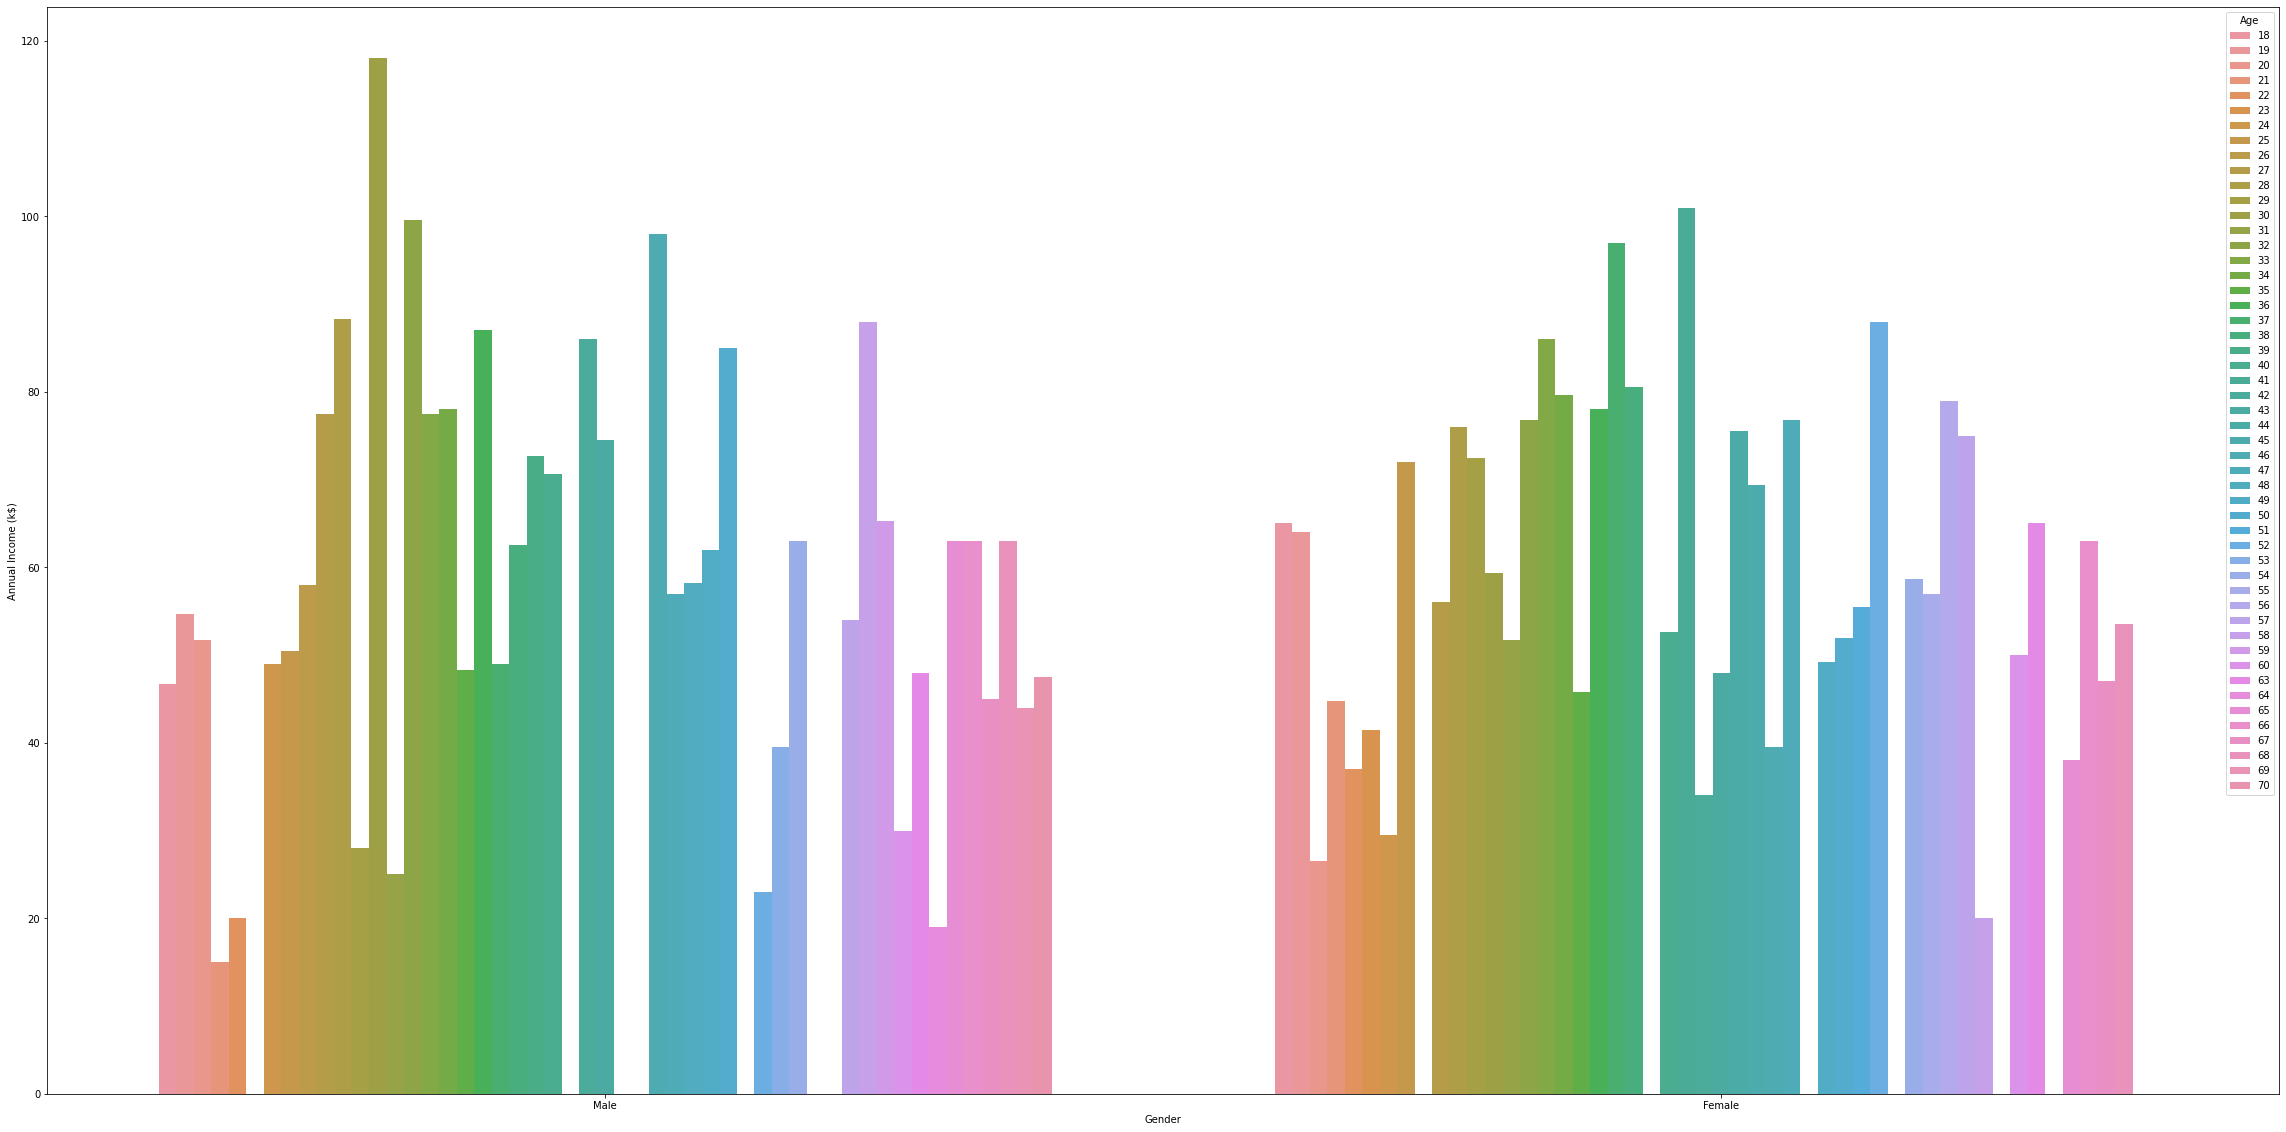

In [61]:
fig,ax= plt.subplots(figsize=(40,20))
sns.barplot(x=mall_df['Gender'],y=mall_df['Annual Income (k$)'],hue=mall_df['Age'],ci=None,ax=ax)
count=len(mall_df['Gender'])
plt.show()

In [62]:
#Taking required columns
X = mall_df.iloc[:, [3, 4]].values

### Plotting Dendogram

## We need to choose the number of clusters and for doing this, we’ll use Dendrograms.

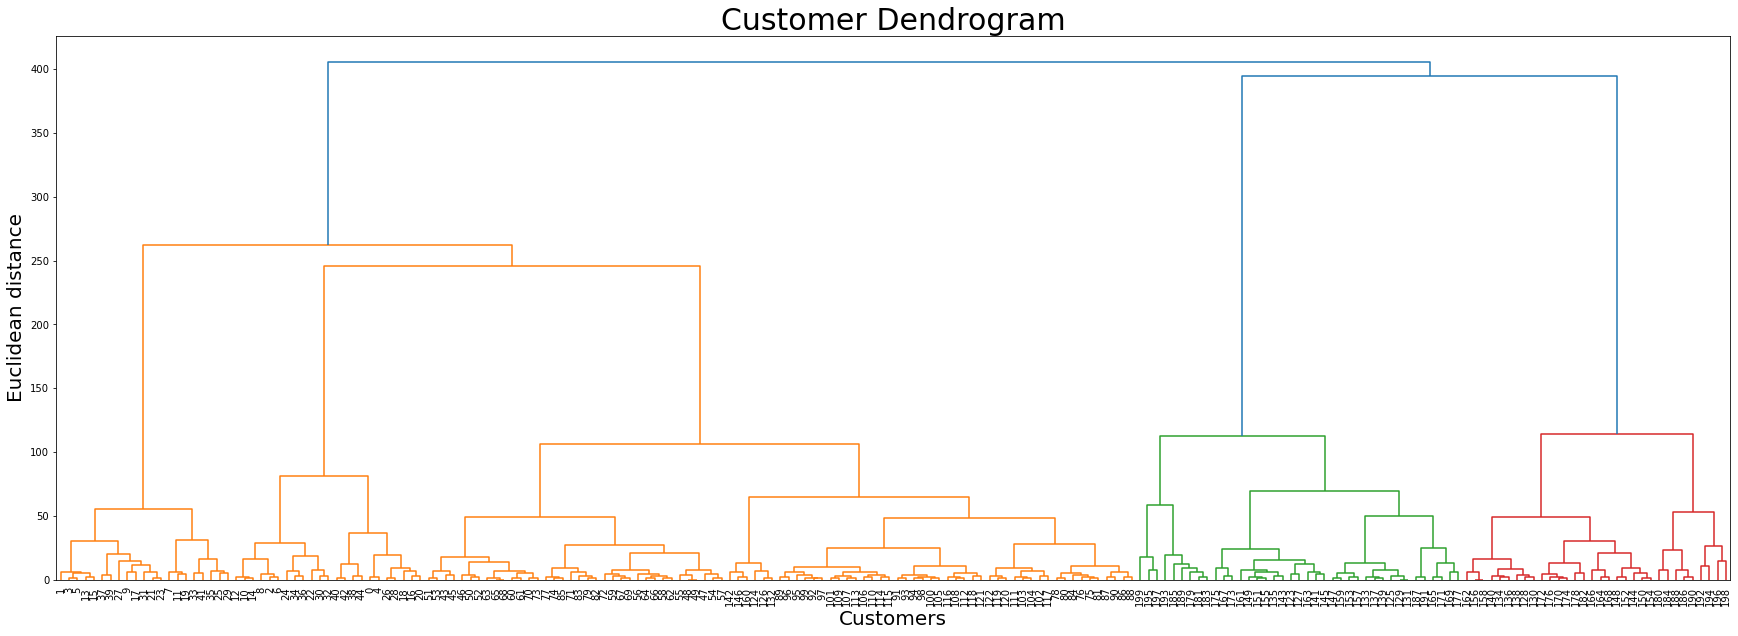

In [66]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=mall_df.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

###### The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with the maximum distance is the blue line and hence we can decide a threshold of 200 and cut the dendrogram:

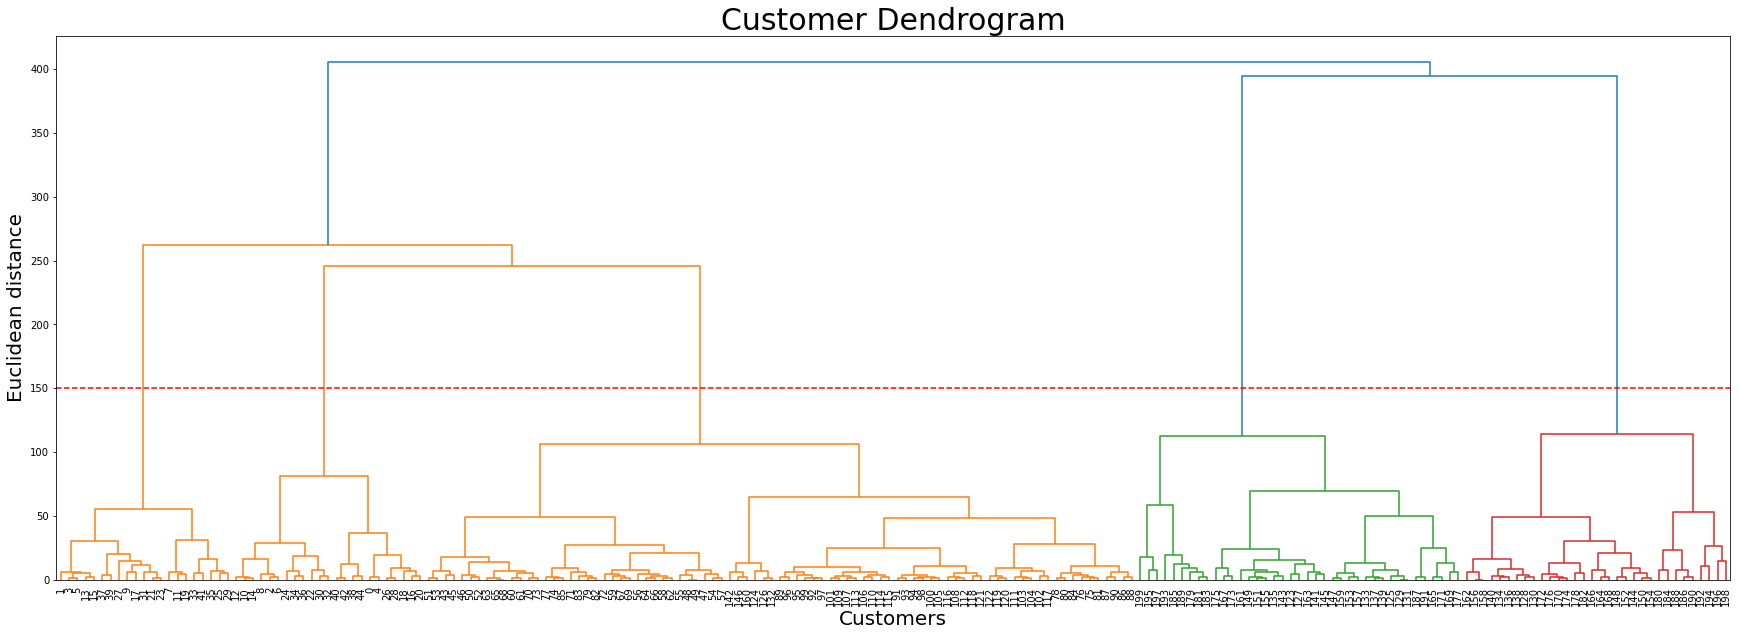

In [72]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=mall_df.index)
plt.axhline(y=150, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

##### In our case, it's 5. So let's fit the Agglomerative model with 5 clusters.

## Agglomerative Clustering Model Building for Hierarchical Clustering

In [69]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

### Visualising Clusters

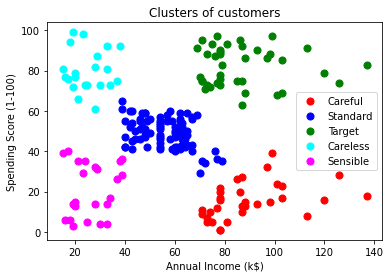

In [70]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Clustering Using K-Means Algorithm

#### Visualizing dataset

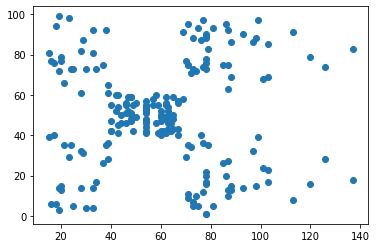

In [76]:
plt.scatter(X[:,0],X[:,1])

### Building the Kmeans model and training the model

In [90]:
Kmeans_model=KMeans(n_clusters=5)
Kmeans_model.fit(X)

KMeans(n_clusters=5)

### Extracting features of the model

In [91]:
#center
C_center=Kmeans_model.cluster_centers_
C_center

array([[86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [92]:
#labels
K_label=Kmeans_model.labels_
K_label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

## Visualizing clusters

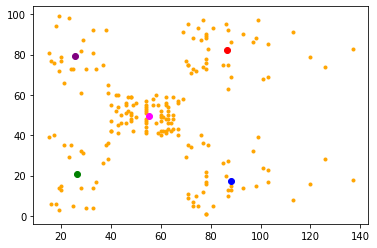

In [95]:
plt.scatter(X[:,0],X[:,1],color='orange',marker=".")
plt.scatter(86.53846154, 82.12820513,color='r')
plt.scatter(88.2, 17.11428571,color='b')
plt.scatter(55.2962963 , 49.51851852,color='magenta')
plt.scatter(25.72727273, 79.36363636,color='purple')
plt.scatter(26.30434783, 20.91304348,color='g')
plt.show()

### Using test data to predict the cluster using the model

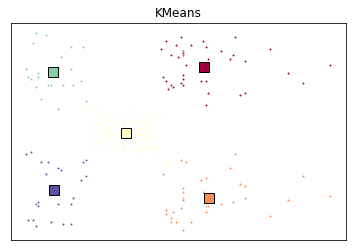

In [104]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(K_label))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,5], [0, -1], [2, -3], [1, 2], [5,2]])), colors):
    

    my_members = (K_label == k)
    C_centered = C_center[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot( C_centered[0],  C_centered[1], marker='s', markerfacecolor=col,  markeredgecolor='k', markersize=10)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

### Rebuild the Model with the Optimum K Value

### Finding the optimum value of K using Elbow Method

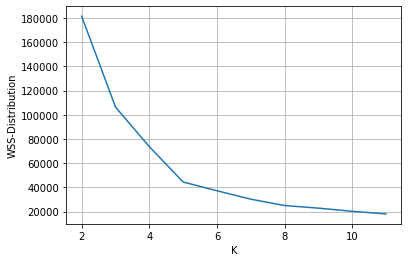

In [105]:
Wss=[]

for k in range(2,12):
    Kmeans_model=KMeans(n_clusters=k)
    Kmeans_model.fit(X)
    Wss.append(Kmeans_model.inertia_)
plt.plot(range(2,12),Wss)    
plt.grid(True)
plt.xlabel("K")
plt.ylabel("WSS-Distribution")

plt.show()

#### Elbow suggest that K should be 5

### Finding the optimum value of K and cluster efficiency using Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395


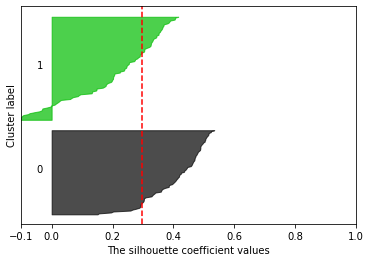

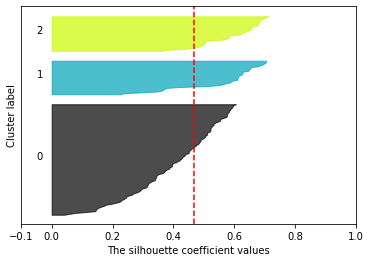

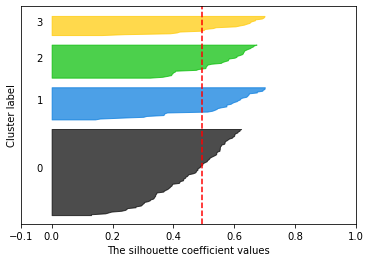

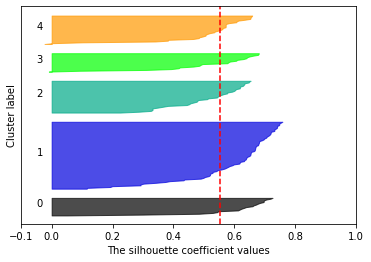

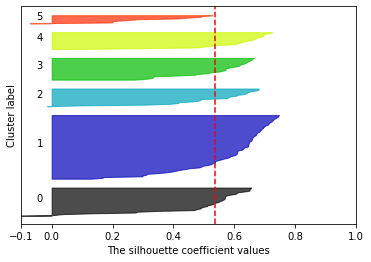

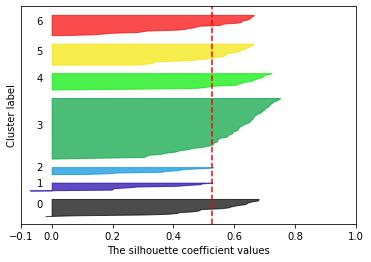

In [106]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

We find from both the metrics that K=5 is the optimum value.

### Rebuilding the Model using K=5

In [107]:
Kmeans_model_5 = KMeans(n_clusters=5)
Kmeans_model_5.fit(X)

KMeans(n_clusters=5)

### Extracting features of the model

In [108]:
#center
cluster_centroid_5 = Kmeans_model_5.cluster_centers_
cluster_centroid_5

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513]])

In [109]:
labels_5 = Kmeans_model_5.labels_
labels_5

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2,
       3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 4, 2, 4, 1, 4, 1, 4,
       2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

### Visualizing the final clusters

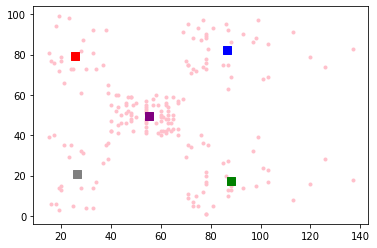

In [110]:
centroid_colors=['red','green','purple','gray','blue']
c=0
plt.scatter(X[ : , 0], X[ : , 1], marker='.', c='pink')
for i,j in Kmeans_model_5.cluster_centers_:
  plt.scatter(i, j, s=50, c=centroid_colors[c], marker='s')
  c=c+1
plt.show()

#### square box shows the centroids

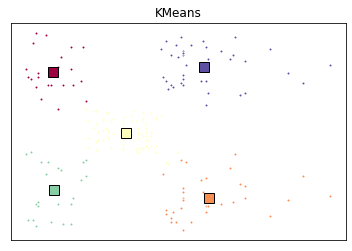

In [112]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels_5))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,5], [0, -1], [2, -3], [1, 2], [5,2]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (labels_5 == k)
    
    # Define the centroid, or cluster center.
    cluster_centroid = cluster_centroid_5[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_centroid[0], cluster_centroid[1], marker='s', markerfacecolor=col,  markeredgecolor='k', markersize=10)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

In [114]:
from yellowbrick.cluster import KElbowVisualizer

In [115]:
Wss=[]

for k in range(2,12):
    Kmeans_model=KMeans(n_clusters=k)
    Kmeans_model.fit(X)
    Wss.append(Kmeans_model.inertia_)

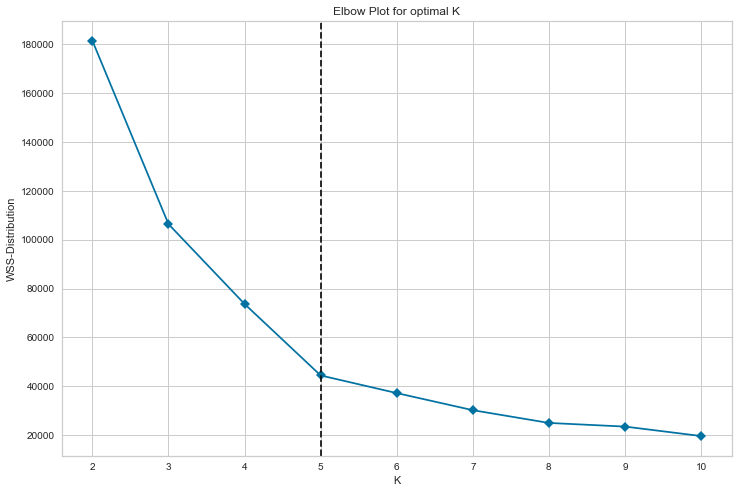

In [116]:
plt.figure(figsize=(12,8))    
KElbowVisualizer(Kmeans_model,timings=False,linewidth=.2).fit(X);
plt.title("Elbow Plot for optimal K")
plt.xlabel("K")
plt.ylabel("WSS-Distribution")

plt.show()

#### Clustering Using K-Means Algorithm gives us 5 as k value which shows we 5 types of customers category. Based on these 5 categories we can decide our target customers

## Applying default DBSCAN algorithm to cluster the data

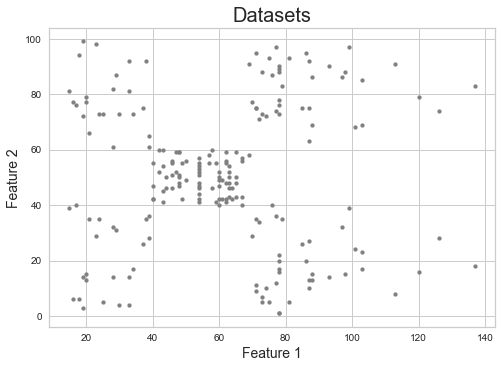

In [140]:
#plt.figure(figsize=(10,10))
plt.scatter(mall_df['Annual Income (k$)'],mall_df['Spending Score (1-100)'],s=15,color='grey')
plt.title('Datasets',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [142]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=5,random_state=42)
k_means.fit(mall_df[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5, random_state=42)

In [143]:
mall_df['KMeans_labels']=k_means.labels_

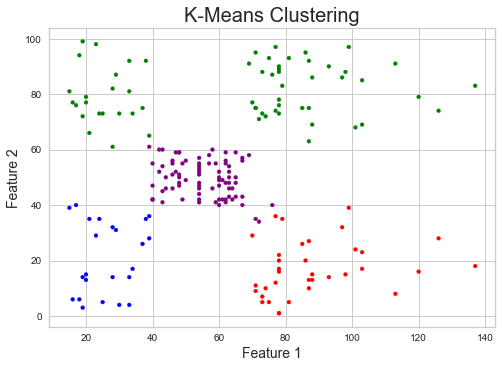

In [147]:
# Plotting resulting clusters
import matplotlib
colors=['purple','red','blue','green']
#plt.figure(figsize=(10,10))
plt.scatter(mall_df['Annual Income (k$)'],mall_df['Spending Score (1-100)'],c=mall_df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

### Model Building Agglomerative

In [148]:
from sklearn.cluster import AgglomerativeClustering
x= mall_df.iloc[:, [3, 4]].values

In [156]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

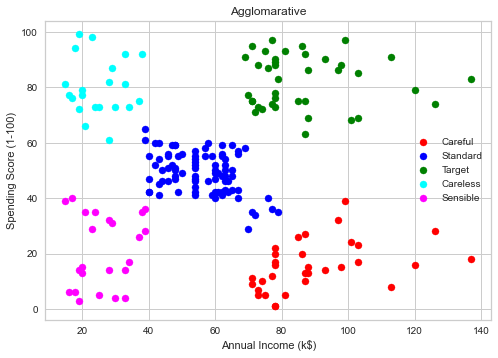

In [157]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Agglomarative')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [158]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(mall_df[['Annual Income (k$)','Spending Score (1-100)']])

DBSCAN()

In [155]:
mall_df['DBSCAN_labels']=dbscan.labels_ 

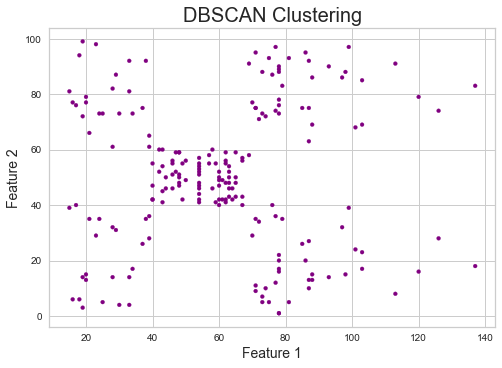

In [160]:
# Plotting resulting clusters
plt.scatter(mall_df['Annual Income (k$)'],mall_df['Spending Score (1-100)'],c=mall_df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## Applying DBSCAN algorithm with Hyperparameters to cluster the data

In [163]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(mall_df[['Annual Income (k$)','Spending Score (1-100)']])
distances, indices = nbrs.kneighbors(mall_df[['Annual Income (k$)','Spending Score (1-100)']])

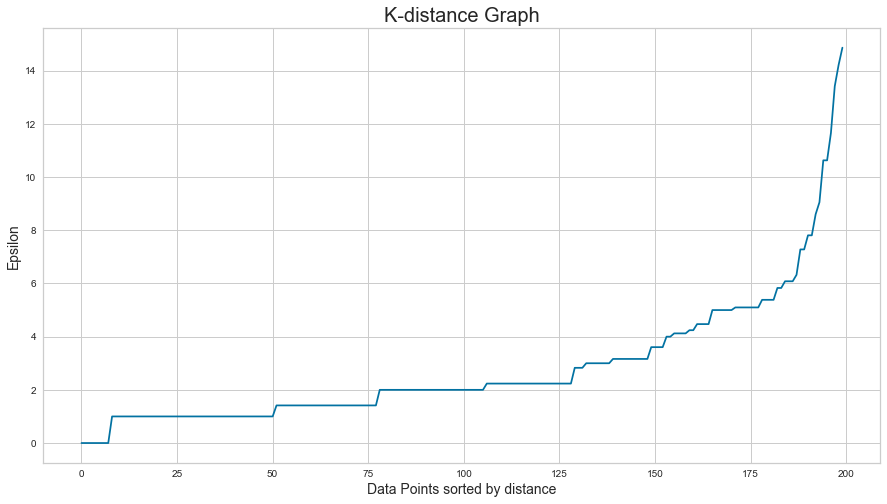

In [164]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
#plt.axhline(y=0.075, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

###### we can see we got approximately epsilon value as 3

In [187]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(mall_df[['Annual Income (k$)','Spending Score (1-100)']])
distances, indices = nbrs.kneighbors(mall_df[['Annual Income (k$)','Spending Score (1-100)']])

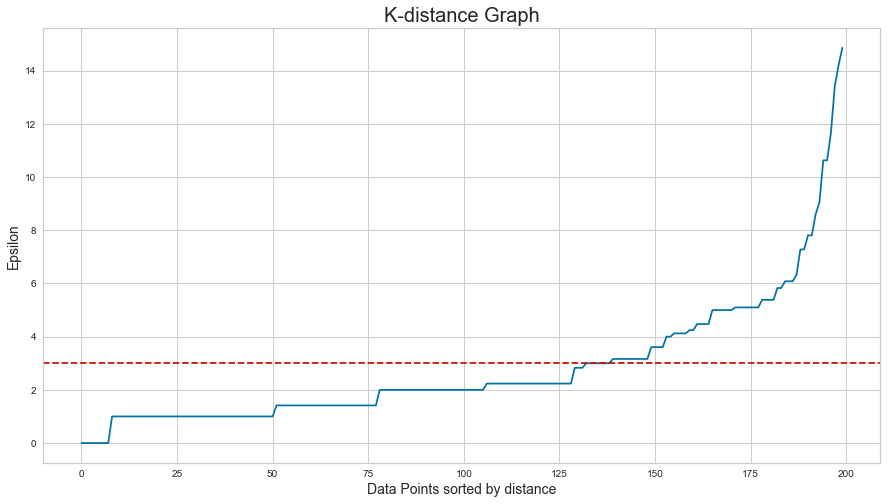

In [188]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=3, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

###### we can see we got approximately epsilon value as 2.3

In [189]:
eps=10
for min_samples in [5,6,7,8,9,10]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(mall_df)

    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 10 | min_samples=  5 | obtained clustering:  [(1, 127), (2, 9), (3, 5), (4, 11), (5, 12), (6, 8), (7, 6), (8, 4), (9, 6), (10, 7), (11, 5)]
eps= 10 | min_samples=  6 | obtained clustering:  [(1, 176), (2, 6), (3, 4), (4, 8), (5, 6)]
eps= 10 | min_samples=  7 | obtained clustering:  [(1, 200)]
eps= 10 | min_samples=  8 | obtained clustering:  [(1, 200)]
eps= 10 | min_samples=  9 | obtained clustering:  [(1, 200)]
eps= 10 | min_samples=  10 | obtained clustering:  [(1, 200)]


### At minimum sample =6 we got 5 clusters which suits bests to me

#### Conclusion:
    - I tried 3 models to identify the types of the customers in our dataset
    - based on spending scores and annual income all gives 5 clusters or we can say 5 types of customers are there.
    - As per my suggestion i will prefer  AgglomerativeClustering cluster using hierarchical is best model in which I labels 
    the customers as careful, Target, careless,standard and sensible
    